Original  files from audio surveys vary in length: ~2 sec to 6 secs with long silences or noises.

This jp notebook allows users to load a wav file and trim it manually.

Why I did manual trimming instead of using a more intellient approach.

Earlier work:

*   Remove silent sections at the beginning and end of file.
*   Use MFA to align 'Fourtbrain', split the audio file.


Both approaches lost ~%20-30 amount of data. Since the dataset is small and donot want to loose any data, I trimmed audio files manually.


In [78]:
from google.colab import drive
import warnings
import numpy as np
import os
warnings.simplefilter("ignore", UserWarning)
from matplotlib import pyplot as plt
import glob
from scipy.io import wavfile as wav
import librosa
from IPython.display import Audio


# Mount google drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/SpotifyFourthBrainPartnerProject/HeyFBProject/')

# Read the existing audio files into a list for processing

In [74]:
fourthbrain_list = glob.glob('fourthbrain_16000/*.wav')

print(len(fourthbrain_list))

110


# Load audio files, plot waveform, trim manually and check the trimmed audio

In [61]:
file_index = 105

original_filename = fourthbrain_list[file_index]
trimmed_filename = os.path.join(original_filename.split('/')[0],'trimmed',original_filename.split('/')[1])

print(original_filename)
print(trimmed_filename in fourthbrain_list_trimmed)

sounddata=wav.read(original_filename)[1]

fourthbrain_16000/610db8f0b4ffdeeaa7aea1b7.wav
False


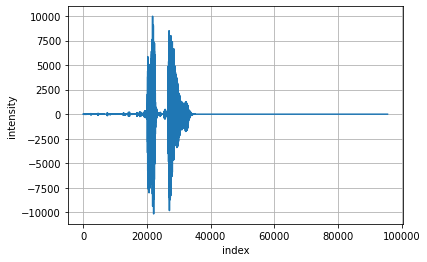

In [62]:
plt.plot(np.arange(0, len(sounddata), 1),sounddata)
plt.ylabel('intensity')
plt.xlabel('index')
plt.grid(True)
plt.show()

In [63]:
start = 19000
end = 35000

trimmed_sounddata = sounddata[start-100:end+100]
wav.write(trimmed_filename, 16000, trimmed_sounddata)

print(original_filename,trimmed_filename)

#!ls fourthbrain_16000/trimmed/

fourthbrain_16000/610db8f0b4ffdeeaa7aea1b7.wav fourthbrain_16000/trimmed/610db8f0b4ffdeeaa7aea1b7.wav


In [64]:
sounddata_new = librosa.core.load(trimmed_filename, sr=16000, mono=True)[0]
print('total duration',len(sounddata_new)/16000)
Audio(sounddata_new,rate=16000)

total duration 1.0125


In [65]:
print(trimmed_filename)

fourthbrain_16000/trimmed/610db8f0b4ffdeeaa7aea1b7.wav


In [57]:
#!rm fourthbrain_16000/trimmed/610dba03b3a7b60345b49ae5.wav

# Sanity check for missing data after trimming

remove the files below from analysis (bad recording/incomplete recording)

fourthbrain_16000/trimmed/610dba03b3a7b60345b49ae5.wav

fourthbrain_16000/trimmed/610dba553b684eae869a3f55.wav


In [71]:
fourthbrain_list_trimmed = glob.glob('fourthbrain_16000/trimmed/*.wav')

In [72]:
fb_trimmed_names=[]
for j in range(len(fourthbrain_list_trimmed)):
   fb_trimmed_names.append(fourthbrain_list_trimmed[j].split('/')[-1])
fb_names=[]
for j in range(len(fourthbrain_list)):
   fb_names.append(fourthbrain_list[j].split('/')[-1])

In [73]:
for i in range(len(fb_names)):
    if not fb_names[i] in fb_trimmed_names:
      print(i,fb_names[i],fb_names[i] in fb_trimmed_names)

81 610dba03b3a7b60345b49ae5.wav False
90 610dba553b684eae869a3f55.wav False
